# Q4

import the libraries

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

read both images and plot them

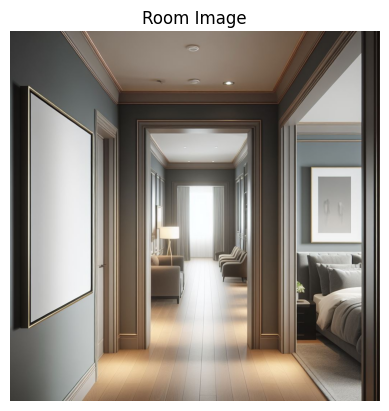

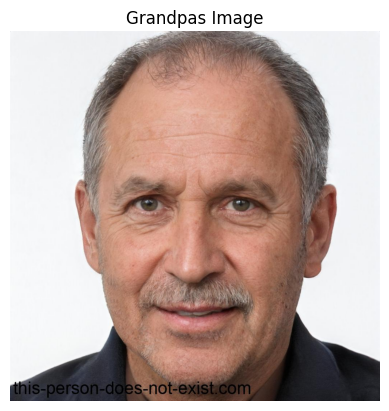

In [49]:
room_img = cv2.imread('./images/q4_room.jpeg')
room_img_gray = cv2.imread('./images/q4_room.jpeg', cv2.IMREAD_GRAYSCALE)
room_img_rgb = cv2.cvtColor(room_img, cv2.COLOR_BGR2RGB)


granny_img = cv2.imread('./images/q4_grandpa.jpeg')
granny_img_gray = cv2.imread('./images/q4_grandpa.jpeg', cv2.IMREAD_GRAYSCALE)
granny_img_rgb = cv2.cvtColor(granny_img, cv2.COLOR_BGR2RGB)

# Display image1 colorful
plt.imshow(room_img_rgb)
plt.title('Room Image')
plt.axis('off')  # Hide axis
plt.show()

# Display image1 gray scale
plt.imshow(granny_img_rgb)
plt.title('Grandpas Image')
plt.axis('off')  # Hide axis
plt.show()


add black ribbon to grandpa image

granny image => heigh: 1024 , width: 1024


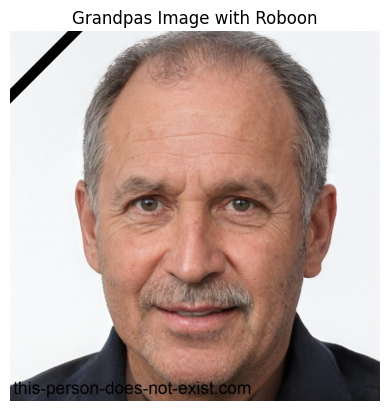

In [50]:
height, width, channels = granny_img.shape
print("granny image => heigh:", height, ", width:", width)

# top_left, top_right, bottom_right, bottom_left
Roboon_place = [(160, 0), (200, 0), (0, 200), (0, 160)]

Roboon_color = (0, 0, 0)

# Draw the region of interest (ROI) polygon on a copy of the image
granny_with_roboon = granny_img.copy()
Roboon_corners = [Roboon_place[0], Roboon_place[1], Roboon_place[2], Roboon_place[3]]
cv2.fillPoly(granny_with_roboon, [np.array(Roboon_corners)], Roboon_color)

# Display the modified image using matplotlib
plt.imshow(cv2.cvtColor(granny_with_roboon, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Grandpas Image with Roboon')
plt.show()

define the coordinates of destination image

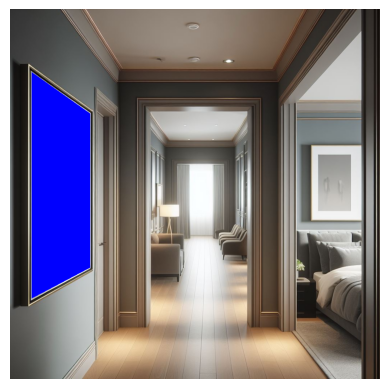

In [51]:
# top_left, top_right, bottom_right, bottom_left
frame_coordinates = [(60, 175), (221, 289), (221, 715), (60, 800)]

frame_color = (255, 0, 0)

# Draw the region of interest (ROI) polygon on a copy of the image
room_img_copy = room_img.copy()
frame_corners = [frame_coordinates[0], frame_coordinates[1], frame_coordinates[2], frame_coordinates[3]]
cv2.fillPoly(room_img_copy, [np.array(frame_corners)], frame_color)

# Display the modified image using matplotlib
plt.imshow(cv2.cvtColor(room_img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

getting the transform matrix </br>
and applying the transform and plot the result

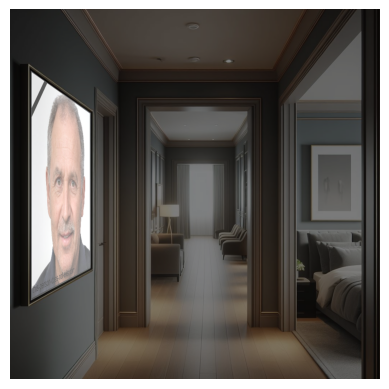

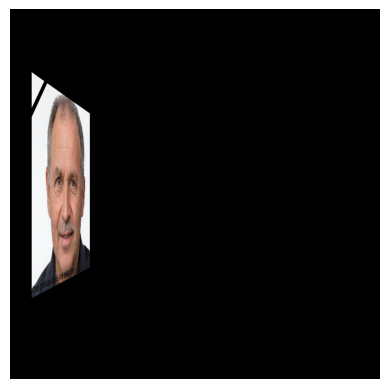

In [58]:
# Load images
first_image = room_img
second_image = granny_with_roboon

# top_left, top_right, bottom_right, bottom_left
frame_coordinates = [(60, 175), (221, 289), (221, 715), (60, 800)]

# Define the region of interest (ROI) in the first image
roi_points = np.array([[60, 175], [221, 289], [221, 715], [60, 800]], dtype=np.float32)

# Define the points of the second image
second_image_height, second_image_width, _ = second_image.shape
second_image_points = np.array([[0, 0], [second_image_width, 0], [second_image_width, second_image_height], [0, second_image_height]], dtype=np.float32)

# Compute the transformation matrix
# Here, you'd typically use techniques like homography to compute the transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(second_image_points, roi_points)

# Warp the second image
height, width, _ = first_image.shape
warped_granny_image = cv2.warpPerspective(second_image, transformation_matrix, (width, height))

# Blend the warped image with the first image
result = cv2.addWeighted(first_image, 0.5, warped_granny_image, 0.6, 0)

# Display the modified image using matplotlib
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Display the modified image using matplotlib
plt.imshow(cv2.cvtColor(warped_granny_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
